哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [2]:
import pandas as pd 

In [12]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df_A = pd.read_csv('A_lvr_land_A.csv')
df_B = pd.read_csv('B_lvr_land_A.csv')
df_E = pd.read_csv('E_lvr_land_A.csv')
df_F = pd.read_csv('F_lvr_land_A.csv')


/Users/rppo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [13]:
#2.刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
df_A = df_A.drop(0).reset_index(drop=True)
df_B = df_B.drop(0).reset_index(drop=True)
df_E = df_E.drop(0).reset_index(drop=True)
df_F = df_F.drop(0).reset_index(drop=True)


In [16]:
#3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
df_A['city'] = 'Taipei'
df_B['city'] = 'New_Taipei'
df_E['city'] = 'Taichung'
df_F['city'] = 'Kaohsiung'

In [18]:
#4. 將以上四份資料運用pd.concat()串接
df_data = pd.concat([df_A, df_B, df_E, df_F], ignore_index = True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59476 entries, 0 to 59475
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   鄉鎮市區           59476 non-null  object 
 1   交易標的           59476 non-null  object 
 2   土地區段位置建物區段門牌   59476 non-null  object 
 3   土地移轉總面積平方公尺    59476 non-null  object 
 4   都市土地使用分區       54097 non-null  object 
 5   非都市土地使用分區      4306 non-null   object 
 6   非都市土地使用編定      4302 non-null   object 
 7   交易年月日          59476 non-null  object 
 8   交易筆棟數          59476 non-null  object 
 9   移轉層次           49724 non-null  object 
 10  總樓層數           49664 non-null  object 
 11  建物型態           59476 non-null  object 
 12  主要用途           47889 non-null  object 
 13  主要建材           49680 non-null  object 
 14  建築完成年月         48690 non-null  object 
 15  建物移轉總面積平方公尺    59476 non-null  object 
 16  建物現況格局-房       59476 non-null  object 
 17  建物現況格局-廳       59476 non-null  object 
 18  建物現況格局

# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [20]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['city','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [43]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df_data = df_data.rename(columns = columns_mapping)
df_data.head(5)

,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,city
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,Taipei
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,Taipei
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.0,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,Taipei
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.0,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,Taipei
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,Taipei


In [64]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df_forLive = df_data.loc[df_data['main_use'] == '住家用'].loc[df_data['use_zoning']=='住'].filter(items = analysis_columns).dropna()
df_forLive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   object 
 5   building_area_square_meter  7802 non-null   object 
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   object 
 9   room_number                 7802 non-null   object 
 10  hall_number                 7802 non-null   object 
 11  health_number               7802 non-null   object 
dtypes: float64(1), object(11)
memory usage: 792.4+ KB


In [65]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df_forLive = df_forLive.astype(columns_type)
df_forLive.info()
df_forLive.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7802 entries, 0 to 51169
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   city                        7802 non-null   object 
 1   towns                       7802 non-null   object 
 2   main_use                    7802 non-null   object 
 3   use_zoning                  7802 non-null   object 
 4   total_price                 7802 non-null   int64  
 5   building_area_square_meter  7802 non-null   float64
 6   main_building_area          7802 non-null   float64
 7   tx_dt                       7802 non-null   object 
 8   unit_price                  7802 non-null   float64
 9   room_number                 7802 non-null   int64  
 10  hall_number                 7802 non-null   int64  
 11  health_number               7802 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 792.4+ KB


,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1
4,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2
6,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2
7,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2


In [66]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df_forLive['tx_dt_year'] = df_forLive['tx_dt'].str[:3]
df_forLive = df_forLive.loc[df_forLive['tx_dt_year'] == '109']
df_forLive = df_forLive.loc[(df_forLive['room_number'] >= 1) & (df_forLive['room_number'] <=5)]
df_forLive = df_forLive.loc[(df_forLive['hall_number'] >= 1) & (df_forLive['hall_number'] <=2)]

df_forLive = df_forLive.reset_index(drop = True)
df_forLive.head(5)

,city,towns,main_use,use_zoning,total_price,building_area_square_meter,main_building_area,tx_dt,unit_price,room_number,hall_number,health_number,tx_dt_year
0,Taipei,文山區,住家用,住,36000000,229.91,110.91,1090406,156583.0,3,2,2,109
1,Taipei,文山區,住家用,住,5580000,37.31,24.58,1090317,149558.0,2,1,1,109
2,Taipei,文山區,住家用,住,18280000,123.66,98.74,1090328,147825.0,3,2,2,109
3,Taipei,文山區,住家用,住,8000000,124.25,90.78,1090417,64386.0,3,1,2,109
4,Taipei,文山區,住家用,住,2200000,30.16,26.15,1090417,72944.0,5,2,2,109


# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [67]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
df_forLive['building_area_square_feet'] = df_forLive['building_area_square_meter'] * 0.3025
df_forLive['main_building_area_square_feet'] = df_forLive['main_building_area'] * 0.3025
df_forLive['unit_price_square_feet'] = df_forLive['unit_price']/0.3025
df_forLive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            6894 non-null   object 
 1   towns                           6894 non-null   object 
 2   main_use                        6894 non-null   object 
 3   use_zoning                      6894 non-null   object 
 4   total_price                     6894 non-null   int64  
 5   building_area_square_meter      6894 non-null   float64
 6   main_building_area              6894 non-null   float64
 7   tx_dt                           6894 non-null   object 
 8   unit_price                      6894 non-null   float64
 9   room_number                     6894 non-null   int64  
 10  hall_number                     6894 non-null   int64  
 11  health_number                   6894 non-null   int64  
 12  tx_dt_year                      68

In [68]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?
df_forLive.describe()


,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.894000e+03,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6894.000000,6.894000e+03
mean,1.138712e+07,121.712089,82.086667,94364.671163,2.850885,1.793299,1.733536,36.817907,24.831217,3.119493e+05
std,1.159445e+07,62.871712,37.363166,58317.311227,0.898498,0.404969,0.681085,19.018693,11.302358,1.927845e+05
min,0.000000e+00,0.970000,0.000000,0.000000,1.000000,1.000000,0.000000,0.293425,0.000000,0.000000e+00
25%,5.580000e+06,82.965000,60.682500,53532.250000,2.000000,2.000000,1.000000,25.096912,18.356456,1.769661e+05
50%,8.550000e+06,109.390000,78.990000,79610.000000,3.000000,2.000000,2.000000,33.090475,23.894475,2.631736e+05
75%,1.329500e+07,147.517500,95.797500,118728.250000,3.000000,2.000000,2.000000,44.624044,28.978744,3.924901e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


In [102]:
# building_area 最小值有 0 的，可能存在異常值

import numpy as np
df_forLive_New = df_forLive.loc[df_forLive['main_building_area'] >5]

In [104]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
df_forLive_New.describe()



,total_price,building_area_square_meter,main_building_area,unit_price,room_number,hall_number,health_number,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6.854000e+03,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,1.141669e+07,121.768404,82.565725,94548.453020,2.849869,1.793114,1.733149,36.834942,24.976132,3.125569e+05
std,1.161669e+07,62.849105,36.940424,58374.690321,0.898343,0.405103,0.680869,19.011854,11.174478,1.929742e+05
min,4.100000e+05,7.440000,7.440000,3239.000000,1.000000,1.000000,0.000000,2.250600,2.250600,1.070744e+04
25%,5.600000e+06,83.012500,61.062500,53597.250000,2.000000,2.000000,1.000000,25.111281,18.471406,1.771810e+05
50%,8.600000e+06,109.405000,79.110000,79742.500000,3.000000,2.000000,2.000000,33.095012,23.930775,2.636116e+05
75%,1.330000e+07,147.445000,95.970000,118880.000000,3.000000,2.000000,2.000000,44.602112,29.030925,3.929917e+05
max,2.250000e+08,1444.950000,335.760000,610104.000000,5.000000,2.000000,6.000000,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [105]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
df_Taipei = df_forLive_New.loc[df_forLive_New['city'] == 'Taipei']
df_Taipei.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1377
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            1376 non-null   object 
 1   towns                           1376 non-null   object 
 2   main_use                        1376 non-null   object 
 3   use_zoning                      1376 non-null   object 
 4   total_price                     1376 non-null   int64  
 5   building_area_square_meter      1376 non-null   float64
 6   main_building_area              1376 non-null   float64
 7   tx_dt                           1376 non-null   object 
 8   unit_price                      1376 non-null   float64
 9   room_number                     1376 non-null   int64  
 10  hall_number                     1376 non-null   int64  
 11  health_number                   1376 non-null   int64  
 12  tx_dt_year                      13

In [134]:
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
import pingouin as pg
import researchpy   
%matplotlib inline

def judge_pearsonr(in_corr):
    if in_corr==1:
        qual = 'Complete'
    elif in_corr > 0.7:
        qual = 'Large'
    elif in_corr > 0.4:
        qual = 'Medium'
    elif in_corr > 0.1:
        qual = 'Low'
    else:
        qual = 'Negligible'
    
    return(qual)

def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)


In [135]:
corr = {}
corr['building_area'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['building_area_square_feet'])
corr['main_building_area'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['main_building_area_square_feet'])
corr['unit_price'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['unit_price_square_feet'])
corr['roomNo'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['room_number'])
corr['hallNo'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['hall_number'])
corr['healthNo'], _ = stats.pearsonr(df_Taipei['total_price'], df_Taipei['health_number'])
corrLevel = {k : judge_pearsonr(v) for k, v in corr.items()}

aov = pg.anova(dv='total_price', between='towns', data=df_Taipei, detailed=True)
#aov
corr['town'] = aov.SS[0] / (aov.SS[0] + aov.SS[1])
corrLevel['town'] = judgment_etaSq(corr['town'])
print('Correlation to total_price: ', corr)

#corr_ = {v : k for k, v in corr.items()}

Correlation to total_price:  {'building_area': 0.8646266775371657, 'main_building_area': 0.7105154108206191, 'unit_price': 0.5812901524655661, 'roomNo': 0.326441400190993, 'hallNo': 0.2707867362222956, 'healthNo': 0.5988317082017813, 'town': 0.06690348031217348}


In [136]:
print('Maximum correlation Level with totalPorice is', corrLevel)



Maximum correlation Level with totalPorice is {'building_area': 'Large', 'main_building_area': 'Large', 'unit_price': 'Medium', 'roomNo': 'Low', 'hallNo': 'Low', 'healthNo': 'Medium', 'town': 'Medium'}


In [137]:
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
corr2 = {}
corr2['building_area'], _ = stats.pearsonr(df_Taipei['unit_price_square_feet'], df_Taipei['building_area_square_feet'])
corr2['main_building_area'], _ = stats.pearsonr(df_Taipei['unit_price_square_feet'], df_Taipei['main_building_area_square_feet'])
corr2['roomNo'], _ = stats.pearsonr(df_Taipei['unit_price_square_feet'], df_Taipei['room_number'])
corr2['hallNo'], _ = stats.pearsonr(df_Taipei['unit_price_square_feet'], df_Taipei['hall_number'])
corr2['healthNo'], _ = stats.pearsonr(df_Taipei['unit_price_square_feet'], df_Taipei['health_number'])
corrLevel2 = {k : judge_pearsonr(v) for k, v in corr2.items()}

aov2 = pg.anova(dv='unit_price_square_feet', between='towns', data=df_Taipei, detailed=True)
corr2['town'] = aov2.SS[0] / (aov2.SS[0] + aov2.SS[1])
corrLevel2['town'] = judgment_etaSq(corr2['town'])
print('Correlation to unit_price: ', corrLevel2)


Correlation to unit_price:  {'building_area': 'Low', 'main_building_area': 'Low', 'roomNo': 'Negligible', 'hallNo': 'Negligible', 'healthNo': 'Low', 'town': 'Large'}


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

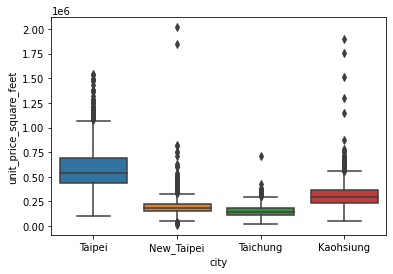

In [143]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
ax = sns.boxplot(x="city", y="unit_price_square_feet", data=df_forLive_New)


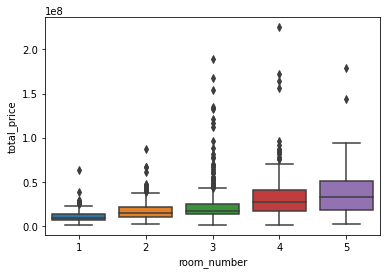

In [144]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
ax2 = sns.boxplot(x="room_number", y="total_price", data=df_Taipei)

<ipython-input-156-896216158d55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Taipei['towns_la'] = labelEncoder.fit_transform(df_Taipei['towns'])


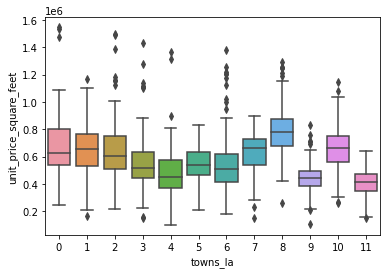

In [156]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_Taipei['towns_la'] = labelEncoder.fit_transform(df_Taipei['towns'])
ax3 = sns.boxplot(x="towns_la", y="unit_price_square_feet", data=df_Taipei)

In [163]:
print('中位數最高區域: ', df_Taipei.loc[df_Taipei['towns_la'] == 8]['towns'].iloc[0])

中位數最高區域:  大安區
